In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
#Details about the dataset
df=pd.read_csv("D:\Downloads\golddata.csv") 
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    818 non-null    object 
 1   price   818 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


Index(['date', 'price'], dtype='object')

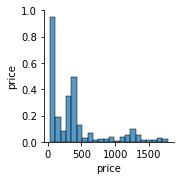

In [3]:
#Data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(df)

In [4]:
#series = pd.read_csv('D:\Downloads\golddata.csv',index_col=0,header=0,parse_dates=False, squeeze=True)
#series.plot()
#plt.xlabel("Date")
#plt.ylabel("Price (USD)")
#plt.show()

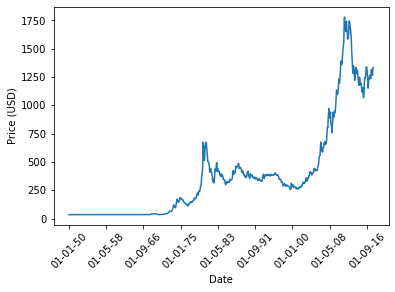

In [4]:
#visulisation
series = pd.read_csv('D:\Downloads\golddata.csv',index_col=0,header=0,parse_dates=False, squeeze=True)
series.plot()
plt.xlabel("Date")
plt.ylabel("Price (USD)")
#x=[1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]
plt.xticks(rotation=45)
#plt.plot(count_first_quarter['count'])
plt.show()

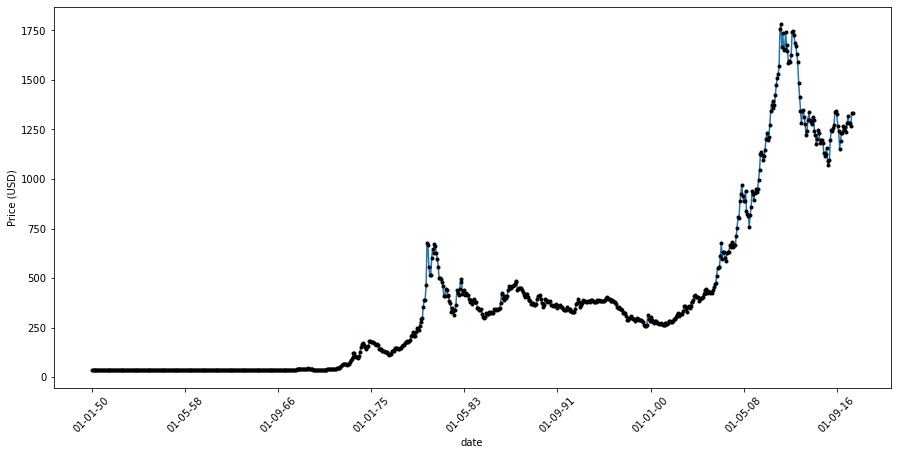

In [7]:
#visulisation
series = pd.read_csv('D:\Downloads\golddata.csv',index_col=0,header=0,parse_dates=False, squeeze=True)
series.plot()
plt.xlabel("Date")
plt.ylabel("Price (USD)")
#x=[1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]
plt.xticks(rotation=45)
#plt.plot(count_first_quarter['count'])
series.plot(style='k.')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

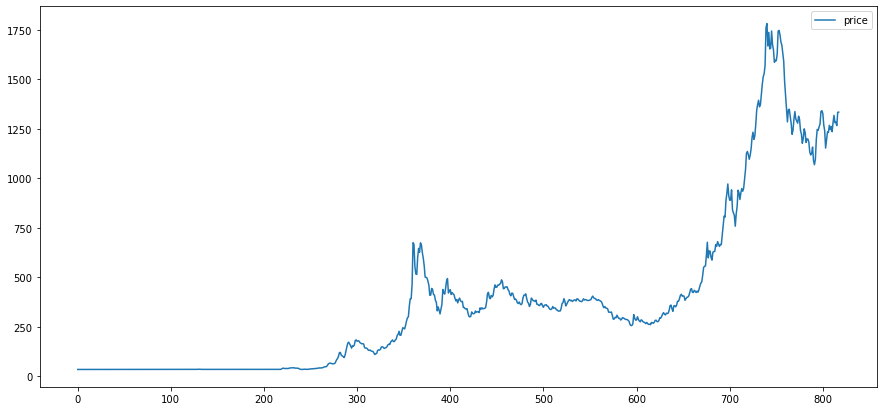

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [9]:
df.head()

,date,price
0,01-01-50,34.73
1,01-02-50,34.73
2,01-03-50,34.73
3,01-04-50,34.73
4,01-05-50,34.73


In [8]:
#preprocessing (Feature scaling/Normalization)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_scale=df[['Date','Price in USD']]
#df_scale=pd.DataFrame(df, columns = df.columns)

In [17]:
#Training the model
'''from sklearn.model_selection import train_test_split
x=df[['date']]
y=df[['price']]
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.20, random_state = 1)
#80% Training 20% Testing'''

"from sklearn.model_selection import train_test_split\nx=df[['date']]\ny=df[['price']]\nx_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.20, random_state = 1)\n#80% Training 20% Testing"

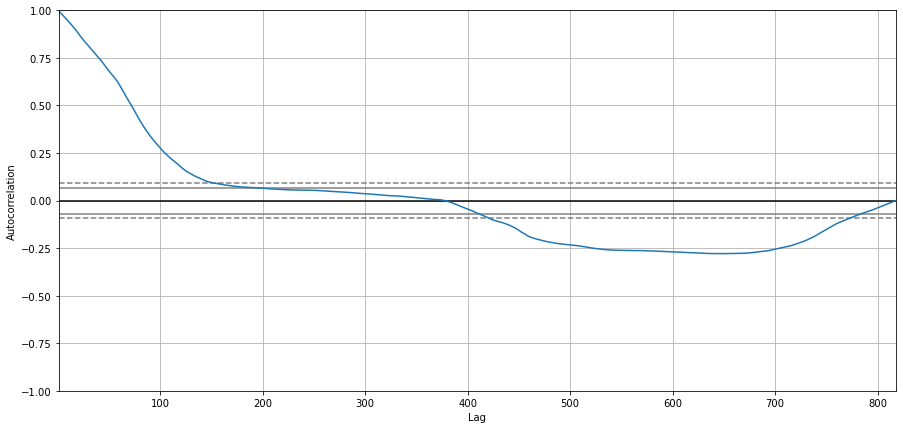

In [10]:
#Auto correlation plot
#used to find the repeating periodic patterns
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

#def parser(x):
#return datetime.strptime('190'+x)

series = read_csv('D:\Downloads\golddata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

C:\Users\Mr.X\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Mr.X\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Mr.X\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  818
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3728.610
Date:                Tue, 05 Jul 2022   AIC                           7469.219
Time:                        20:38:46   BIC                           7497.453
Sample:                             0   HQIC                          7480.055
                                - 818                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2219      0.019     11.657      0.000       0.185       0.259
ar.L2         -0.1190      0.016     -7.593      0.000      -0.150      -0.088
ar.L3          0.0556      0.019      2.915      0.0

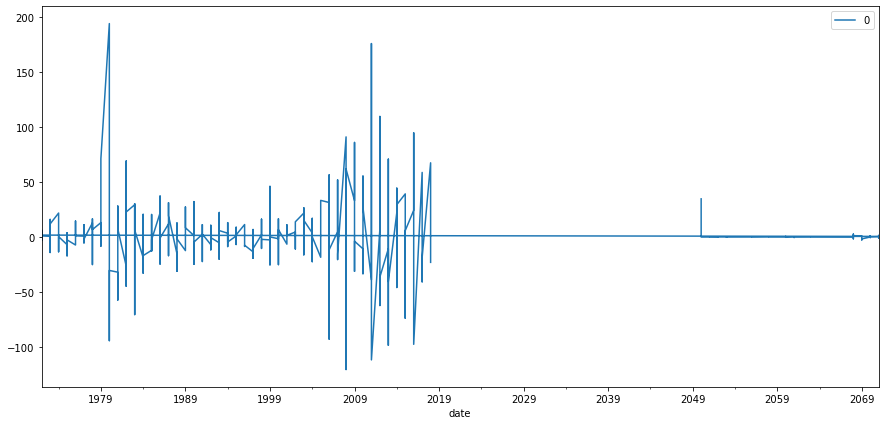

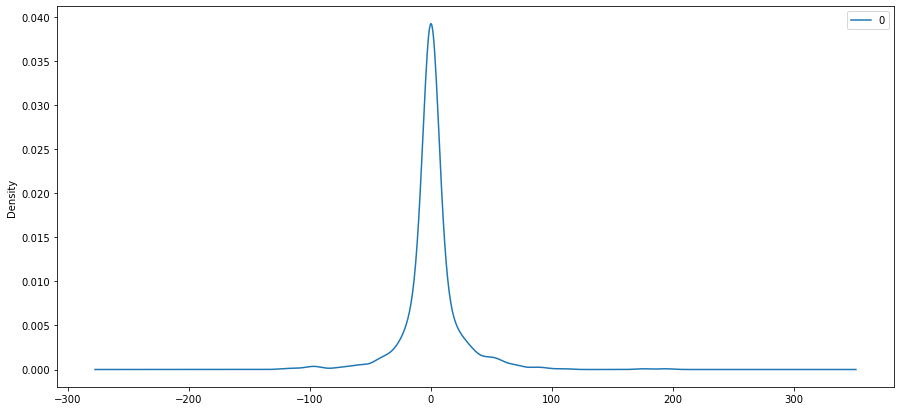

                0
count  818.000000
mean     1.189507
std     23.214673
min   -120.468570
25%     -3.056060
50%      0.004477
75%      4.541606
max    194.133648


In [11]:
#Fitting ARIMA model
#platykurtic curve - how far the data is distributed towards the mean
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
# load dataset
series = read_csv('D:\Downloads\golddata.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
#leftover after fitting
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=399.245822, expected=398.441000
predicted=395.952183, expected=400.133000
predicted=400.577211, expected=405.402000
predicted=404.473729, expected=420.210000
predicted=424.298619, expected=439.059000
predicted=442.200545, expected=442.974000
predicted=440.350262, expected=424.080000
predicted=418.794435, expected=423.430000
predicted=430.196169, expected=434.355000
predicted=437.938313, expected=429.140000
predicted=425.470173, expected=422.903000
predicted=421.535860, expected=430.302000
predicted=433.361864, expected=424.745000
predicted=421.473342, expected=437.773000
predicted=444.323716, expected=455.936000
predicted=456.158349, expected=470.107000
predicted=472.077734, expected=476.668000
predicted=475.472654, expected=509.423000
predicted=520.792621, expected=549.433000
predicted=555.590931, expected=555.518000
predicted=551.241126, expected=557.215000
predicted=560.468036, expected=611.853000
predicted=633.406260, expected=676.769000
predicted=688.846298, expected=597

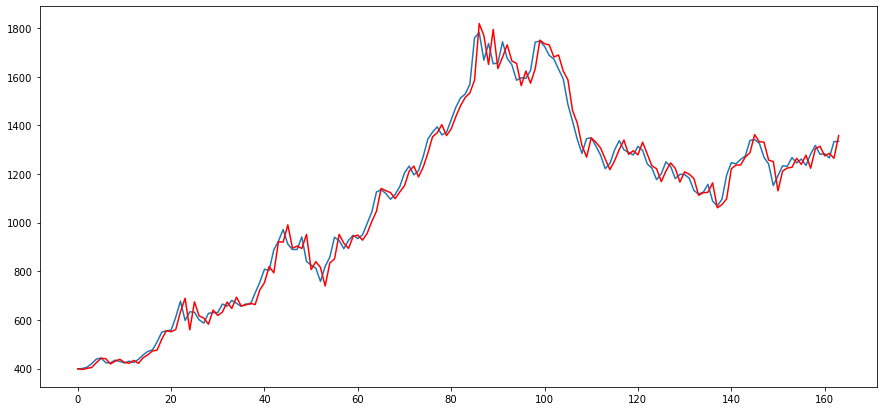

In [16]:
#Evaluating ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('D:\Downloads\golddata.csv', header=0, index_col=0, squeeze=True)
#series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [36]:
pred_5=model_fit.forecast(steps=5)
print(pred_5)

[1357.27555697 1347.86311751 1347.73168287 1344.70344666 1353.009777  ]


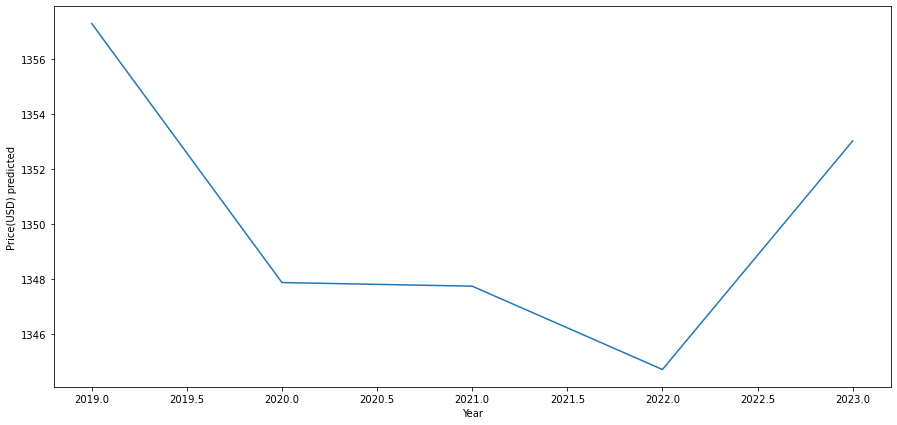

In [37]:
years=[2019,2020,2021,2022,2023]
plt.xlabel('Year')
plt.ylabel('Price(USD) predicted')
plt.plot(years,pred_5)
plt.show()

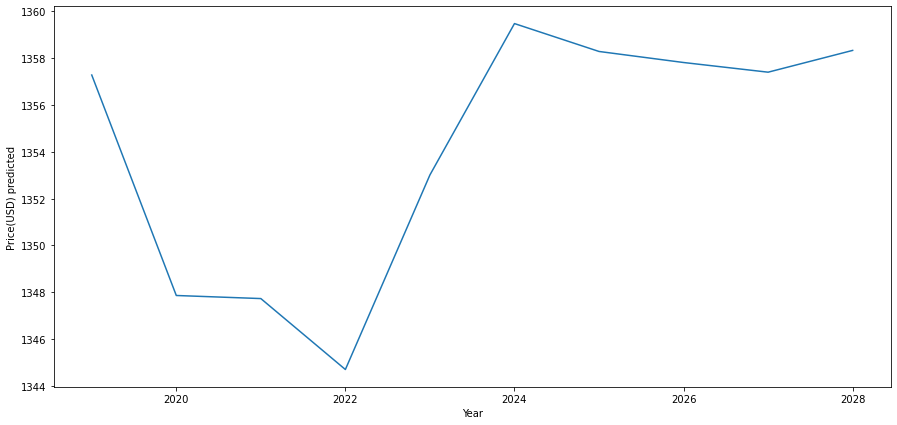

In [38]:
years=[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028]
pred_10=model_fit.forecast(steps=10)
plt.xlabel('Year')
plt.ylabel('Price(USD) predicted')
plt.plot(years,pred_10)
plt.show()

In [47]:
#r2 value - Accuracy
from sklearn.metrics import r2_score
r2=r2_score(test,predictions)
print('%.5f'%r2)
print(f"Accuracy (%): {'%.3f'%(r2*100)}")

0.98612
Accuracy (%): 98.612
